In [2]:
import seaborn as sb
import sys  
import pandas as pd
import requests
import numpy as np
import datetime
import time
import pickle
import matplotlib.pyplot as plt
import time
%matplotlib inline

from bs4 import BeautifulSoup as bs
import urllib

In [1]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [142]:
df = load_obj('data_raw_df')

In [147]:
df [ df['personal'] == 'Не указано']

,about,activities,age_cat,bdate,books,can_access_closed,city,country,education_form,education_status,facebook,facebook_name,faculty,faculty_name,first_name,followers_count,games,graduation,has_mobile,home_phone,home_town,id,instagram,interests,is_closed,last_name,last_seen,livejournal,mobile_phone,movies,music,occupation,personal,quotes,relation,relation_partner,relatives,schools,sex,skype,track_code,twitter,universities,university,university_name,verified


In [143]:
df

,about,activities,age_cat,bdate,books,can_access_closed,city,country,education_form,education_status,facebook,facebook_name,faculty,faculty_name,first_name,followers_count,games,graduation,has_mobile,home_phone,home_town,id,instagram,interests,is_closed,last_name,last_seen,livejournal,mobile_phone,movies,music,occupation,personal,quotes,relation,relation_partner,relatives,schools,sex,skype,track_code,twitter,universities,university,university_name,verified
1,,актриса,30_40,14.11.1984,,True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",NaN,NaN,NaN,NaN,0.0,,Maria,939222.0,,0.0,1,NaN,Москва,45269508,NaN,,False,Kozhevnikova,"{'time': 1556350286, 'platform': 2}",NaN,NaN,,,"{'type': 'university', 'id': 319, 'name': 'ГИТ...",NaN,,0.0,NaN,[],[],1,NaN,b2842eb9f_rndxNFGDYLHVpek0wfI0VPeH7_L2UIFO-0uq...,makozhevnikova,"[{'id': 319, 'country': 1, 'city': 1, 'name': ...",319.0,ГИТИС,1
4,NaN,NaN,30_40,12.4,NaN,True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",NaN,NaN,NaN,NaN,NaN,NaN,Olga,536139.0,NaN,NaN,1,,NaN,314833033,NaN,NaN,False,Seryabkina,"{'time': 1556230267, 'platform': 2}",NaN,,NaN,NaN,"{'type': 'work', 'id': 74417, 'name': 'SEREBRO'}",NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,434bbf0afpE6Ldd9Egf_m5ep42e8CuSMprLVXk-3KngDNZ...,NaN,NaN,NaN,NaN,1
5,🏷Концерты (букинг) +7 985 226 7676\n🛍Реклама/P...,Лена Темникова — популярная российская певица,30_40,18.4,,True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",NaN,NaN,NaN,NaN,0.0,,Elena,528028.0,,0.0,1,NaN,,243556640,lenatemnikovaofficial,,False,Temnikova,"{'time': 1556461840, 'platform': 7}",NaN,NaN,,,"{'type': 'work', 'name': 'TEMNIKOVA'}",{'langs': ['Русский']},,4.0,NaN,[],[],1,NaN,d41b43eaWtMJH9O5e15g3fJZXHfTvmlXuJZi5BDHDqmFUD...,NaN,[],0.0,,1
7,По вопросам организации концертов:\n\nПо вопро...,"певица, актриса, ведущая",30_40,1.3,"Ги де Мопассан, Конфуций, Борис Акунин",True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",NaN,NaN,NaN,NaN,822.0,Факультет физической культуры,Anna,450821.0,,0.0,1,,Москва,164542053,NaN,,False,Semenovich,"{'time': 1556377056, 'platform': 7}",NaN,,"""Служебный роман"", ""Зеленая миля"", ""Человек, к...","Beyonce, Shakira, Алла Пугачева, Уматурман",NaN,{'langs': ['Русский']},,0.0,NaN,[],[],1,NaN,58518e8cqBV_N0KD2JTXIVRWQxh6zZwmEzAV2OmZuWBKdK...,NaN,"[{'id': 209, 'country': 1, 'city': 1, 'name': ...",209.0,МГАФК (Мосспортакадемия),1
9,NaN,NaN,30_40,12.5.1987,NaN,True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",NaN,NaN,NaN,NaN,NaN,NaN,Vika,376624.0,NaN,NaN,1,,NaN,81133993,NaN,NaN,False,Dayneko,"{'time': 1556435385, 'platform': 7}",NaN,NaN,NaN,NaN,"{'type': 'work', 'name': 'Продюссерский центр ...",NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,97803050Z599F6OhYv1wh-5wesMApIgG1QQW0dhxiKXNPz...,VictoriaDaineko,NaN,NaN,NaN,1
13,Дворянка\n,"Актриса театра и кино, телеведущая.",30_40,NaN,Жалоб и предложений,True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",Full-time,Alumna (Specialist),NaN,NaN,1392.0,Режиссерский факультет,Nastasya,329921.0,Сисвипер,0.0,1,,,1734481,NaN,"Театр, кино, МУЗЫКА, эмоции, красота",False,Samburskaya,"{'time': 1556372771, 'platform': 2}",NaN,,Про вампирчиков и Тарантино! И Родригес! И Рич...,,"{'type': 'university', 'id': 319, 'name': 'ГИТ...","{'people_main': 0, 'life_main': 0, 'smoking': ...",Жо не манж па сис жур. Гибен зи мир битте цвей...,0.0,NaN,[],[],1,NaN,ace39b16vwO6_WmbPW6coaIRwWtw81RvjOv8peSPiP1LOJ...,SamburskayaN,"[{'id': 319, 'country': 1, 'city': 1, 'name': ...",319.0,ГИТИС,1
15,NaN,NaN,30_40,1.3.1989,NaN,True,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",NaN,NaN,NaN,NaN,NaN,NaN,Agata,297490.0,NaN,NaN,0,NaN,NaN,20782714,NaN,NaN,False,Muceniece,{'time': 1556441634},NaN,NaN,NaN,NaN,"{'type': 'university', 'id': 111, 'name': 'ВГИК'}",NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,298453a5dag1qic_Ve9z3KQt-rZHQhw-VoB_UEUmOl0OEq...,NaN,NaN,NaN,NaN,1
17,Главная группа В КОНТАКТЕ:\nhttp://vkontakte.r...,"Певица, Телеведущая, Актриса",30_40,16.12,,True,NaN,NaN,NaN,NaN,N

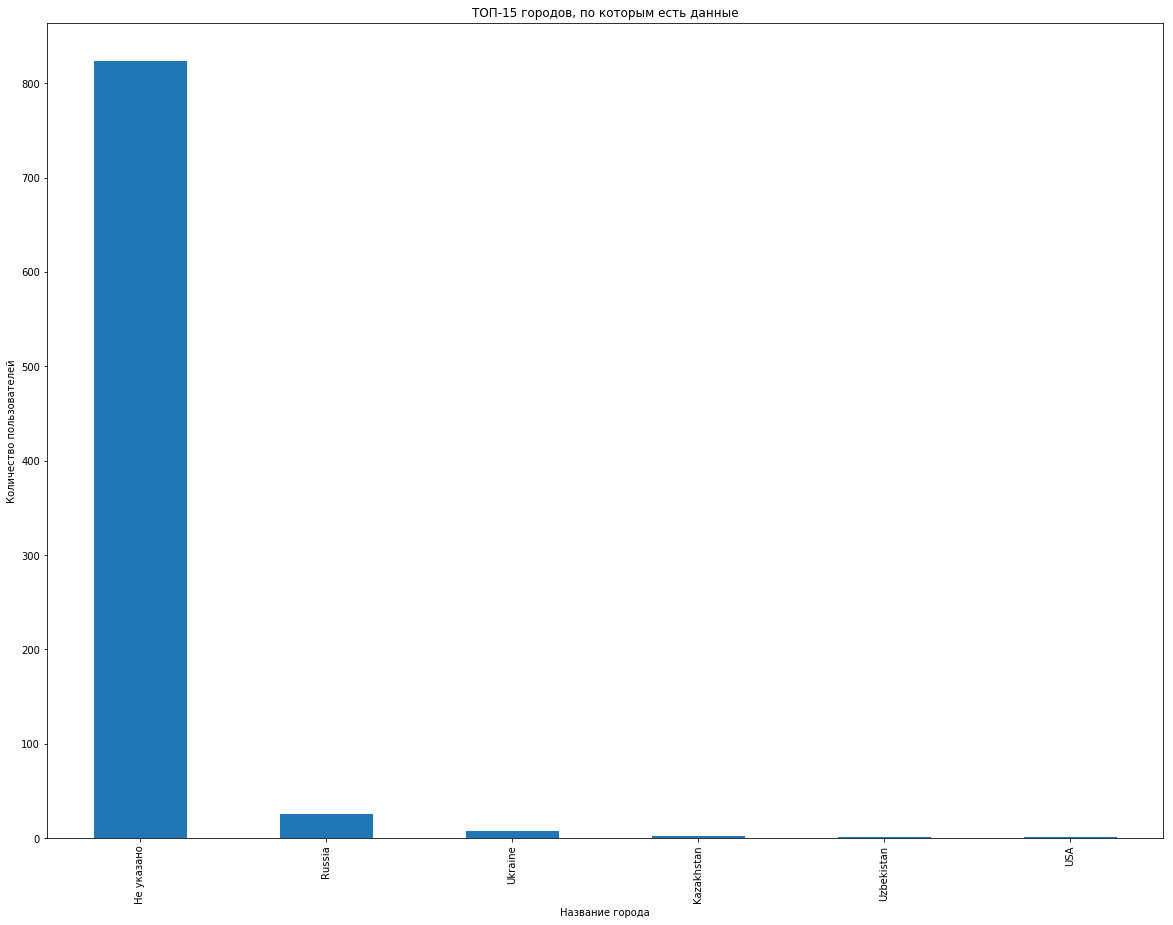

In [141]:
df['country'].value_counts().head(15).plot(kind='bar', figsize=(20,15))
plt.title('ТОП-15 городов, по которым есть данные')
plt.xlabel('Название города')
plt.ylabel('Количество пользователей')
fig = plt.gcf()
fig.savefig('output.png')

In [105]:
df

,about,activities,age_cat,bdate,books,can_access_closed,city,country,education_form,education_status,faculty_name,followers_count,games,graduation,has_mobile,home_town,id,interests,is_closed,movies,music,occupation,quotes,relation,sex,track_code,university_name,verified,political,langs,religion,inspired_by,people_main,life_main,smoking,alcohol,schools_name,schools_grad_year,has_facebook,has_instagram,has_livejournal,has_twitter,has_skype,has_relative
1,,актриса,30_40,14.11.1984,,True,Moscow,Russia,,,,939222,,0,1,Москва,45269508,,False,,,university,,0,1,b2842eb9f_rndxNFGDYLHVpek0wfI0VPeH7_L2UIFO-0uq...,ГИТИС,1,,,,,,,,,,,0,0,0,1,0,1
4,,,30_40,12.4,,True,Moscow,Russia,,,,536139,,-1,1,,314833033,,False,,,work,,-1,1,434bbf0afpE6Ldd9Egf_m5ep42e8CuSMprLVXk-3KngDNZ...,,1,,,,,,,,,,,0,0,0,0,0,1
5,🏷Концерты (букинг) +7 985 226 7676\n🛍Реклама/P...,Лена Темникова — популярная российская певица,30_40,18.4,,True,Moscow,Russia,,,,528028,,0,1,,243556640,,False,,,work,,4,1,d41b43eaWtMJH9O5e15g3fJZXHfTvmlXuJZi5BDHDqmFUD...,,1,,[Русский],,,,,,,,,0,1,0,0,0,1
7,По вопросам организации концертов:\n\nПо вопро...,"певица, актриса, ведущая",30_40,1.3,"Ги де Мопассан, Конфуций, Борис Акунин",True,Moscow,Russia,,,Факультет физической культуры,450821,,0,1,Москва,164542053,,False,"""Служебный роман"", ""Зеленая миля"", ""Человек, к...","Beyonce, Shakira, Алла Пугачева, Уматурман",,,0,1,58518e8cqBV_N0KD2JTXIVRWQxh6zZwmEzAV2OmZuWBKdK...,МГАФК (Мосспортакадемия),1,,[Русский],,,,,,,,,0,0,0,0,0,1
9,,,30_40,12.5.1987,,True,Moscow,Russia,,,,376624,,-1,1,,81133993,,False,,,work,,-1,1,97803050Z599F6OhYv1wh-5wesMApIgG1QQW0dhxiKXNPz...,,1,,,,,,,,,,,0,0,0,1,0,1
13,Дворянка\n,"Актриса театра и кино, телеведущая.",30_40,,Жалоб и предложений,True,Moscow,Russia,Full-time,Alumna (Specialist),Режиссерский факультет,329921,Сисвипер,0,1,,1734481,"Театр, кино, МУЗЫКА, эмоции, красота",False,Про вампирчиков и Тарантино! И Родригес! И Рич...,,university,Жо не манж па сис жур. Гибен зи мир битте цвей...,0,1,ace39b16vwO6_WmbPW6coaIRwWtw81RvjOv8peSPiP1LOJ...,ГИТИС,1,,,,,,,,,,,0,0,0,1,0,1
15,,,30_40,1.3.1989,,True,Moscow,Russia,,,,297490,,-1,0,,20782714,,False,,,university,,-1,1,298453a5dag1qic_Ve9z3KQt-rZHQhw-VoB_UEUmOl0OEq...,,1,,,,,,,,,,,0,0,0,0,0,1
17,Главная группа В КОНТАКТЕ:\nhttp://vkontakte.r...,"Певица, Телеведущая, Актриса",30_40,16.12,,True,Не указан город,,,,,271600,,0,1,,62896960,,False,,,university,,0,1,7975c22d5oG7-fUCOKf0uouHlMClUCNOoYg-iIKIYm-i8O...,КНУКиИ,1,,"[Русский, English]",,,,,,,,,0,0,0,0,0,1
18,,,30_40,2.7.1982,,True,Moscow,Russia,,,,269528,,-1,1,,60731512,,False,,,work,,-1,1,34bfce455LwuLHjqmVqXc2vwedOdPTTFFHuXFwHhRz7Mcj...,,1,,,,,,,,,,,0,0,0,0,0,1
22,,Эзотерика,30_40,18.9.1988,*Анастасия-Влади́мир Мегре́ * Портрет Дориана ...,True,Tallinn,Estonia,,,,223979,,0,1,Раквере,156432930,"фотография, Эзотерика",False,,,,"“In order to experience everyday spirituality,...",0,1,8b0ec723Vrcmg8oRplL3-ldLEyUBaAFrvjMXAgXUmhl1l2...,,1,,"[English, Eesti, Русский]",,,,,,,,,0,0,0,0,0,1


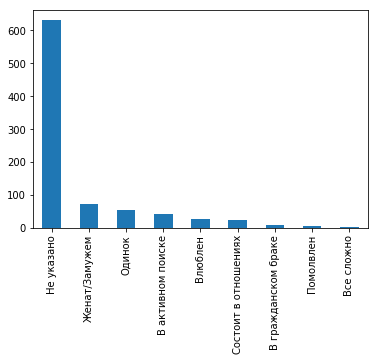

In [118]:
df['relation'].value_counts().plot(kind='bar')

In [115]:
relation_dict = {-1 : 'Не указано', 4 : 'Женат/Замужем', 1 : 'Одинок', 6 : 'В активном поиске', 7 : 'Влюблен', 2: 'Состоит в отношениях',
                3: 'Помолвлен', 5 : 'Все сложно', 8 : 'В гражданском браке'}

In [116]:
df.loc[df['relation'] == 0,:] = -1

In [117]:
df['relation'].replace(relation_dict,inplace=True)

In [120]:
df['political'].value_counts()

      594
-1    196
3      39
8      15
4       5
6       4
9       2
2       2
1       2
7       1
Name: political, dtype: int64

In [123]:
dict_politican = {-1 : 'не указано',1 : 'Communist',2 : 'Socialist',3 : 'Moderate',4 : 'Liberal',5 : 'Conservative',6  :'Monarchist',7 : 'Ultraconservative',8 : 'Apathetic',9 :'Libertarian'}

In [127]:
df.loc[df['occupation'] == '',:] = -1
df.loc[df['occupation'] == -1,:] = 'Не указано'

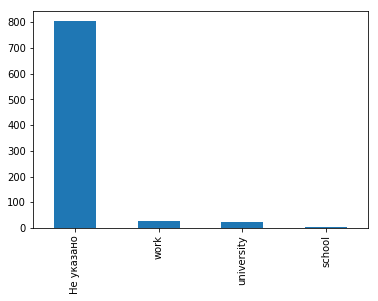

In [128]:
df['occupation'].value_counts().plot(kind='bar')

In [139]:
df['people_main'].value_counts()

Не указано    818
2              23
5               6
                5
6               3
1               3
3               2
Name: people_main, dtype: int64

In [131]:
df.loc[df['smoking'] == '',:] = 'Не указано'


In [135]:
smoke_dict = {1 : 'very negative',2 : 'negative',3 : 'neutral',4 : 'compromisable',5 : 'positive'}

In [136]:
df['smoking'].replace(smoke_dict ,inplace=True)

In [140]:
df.loc[df['people_main'] == '',:] = 'Не указано'

In [ ]:
people_dict = {1 : 'intellect and creativity',2 : 'kindness and honesty',3 : 'health and beauty',4 : 'wealth and power',5 : 'courage and persistance',6 : 'humor and love for life'}